# Modular Addition

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ModAdd`
An n-bit modular addition gate.

Implements |x>|y> => |x>|y + x % p> using $4n$ Toffoli
gates.

This gate can also operate on integers in the Montgomery form.

#### Parameters
 - `bitsize`: Number of bits used to represent each integer.
 - `mod`: The modulus for the addition. 

#### Registers
 - `x`: A bitsize-sized input register (register x above).
 - `y`: A bitsize-sized input/output register (register y above). 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Construction from Figure 6a and cost summary in Figure 8.


In [2]:
from qualtran.bloqs.mod_arithmetic import ModAdd

### Example Instances

In [3]:
n, p = sympy.symbols('n p')
mod_add = ModAdd(n, mod=p)

#### Graphical Signature

In [4]:
from qualtran.drawing import show_bloqs
show_bloqs([mod_add],
           ['`mod_add`'])

### Call Graph

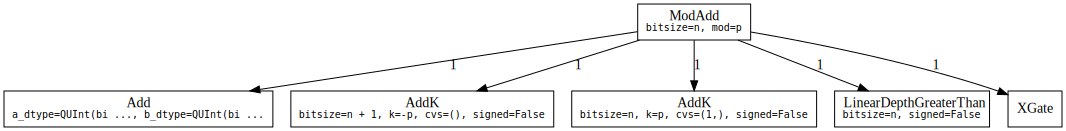

#### Counts totals:
 - `AddK`: 1
 - `AddK`: 1
 - `Add`: 1
 - `LinearDepthGreaterThan`: 1
 - `XGate`: 1

In [5]:
from qualtran.resource_counting.generalizers import ignore_split_join
mod_add_g, mod_add_sigma = mod_add.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(mod_add_g)
show_counts_sigma(mod_add_sigma)

## `ModAddK`
Applies U(add, M)|x> = |(x + add) % M> if x < M else |x>.

Applies modular addition to input register `|x>` given parameters `mod` and `add_val` s.t.
 1. If integer `x` < `mod`: output is `|(x + add) % M>`
 2. If integer `x` >= `mod`: output is `|x>`.

This condition is needed to ensure that the mapping of all input basis states (i.e. input
states |0>, |1>, ..., |2 ** bitsize - 1) to corresponding output states is bijective and thus
the gate is reversible.

Also supports controlled version of the gate by specifying a per qubit control value as a tuple
of integers passed as `cvs`.

In [6]:
from qualtran.bloqs.mod_arithmetic import ModAddK

### Example Instances

In [7]:
n, m, k = sympy.symbols('n m k')
mod_add_k = ModAddK(bitsize=n, mod=m, add_val=k)

In [8]:
mod_add_k_small = ModAddK(bitsize=4, mod=7, add_val=1)

In [9]:
mod_add_k_large = ModAddK(bitsize=64, mod=500, add_val=23)

#### Graphical Signature

In [10]:
from qualtran.drawing import show_bloqs
show_bloqs([mod_add_k, mod_add_k_small, mod_add_k_large],
           ['`mod_add_k`', '`mod_add_k_small`', '`mod_add_k_large`'])

### Call Graph

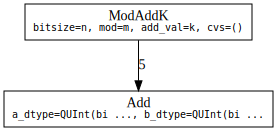

#### Counts totals:
 - `Add`: 5

In [11]:
from qualtran.resource_counting.generalizers import ignore_split_join
mod_add_k_g, mod_add_k_sigma = mod_add_k.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(mod_add_k_g)
show_counts_sigma(mod_add_k_sigma)

## `CModAdd`
Controlled Modular Addition.

Implements $\ket{c}\ket{x}\ket{y} \rightarrow \ket{c}\ket{x}\ket{(cx+y)\%p}$
using $5n+1$ Toffoli gates.

Note: The reference reports $5n$ toffolis. Our construction has an extra toffoli gate due
to the current implementaiton of `OutOfPlaceAdder`.

#### Parameters
 - `dtype`: Type of the input registers.
 - `mod`: The modulus for the addition.
 - `cv`: Control value for which the gate is active. 

#### Registers
 - `ctrl`: The control qubit.
 - `x`: A dtype register.
 - `y`: A dtype register. 

#### References
 - [How to compute a 256-bit elliptic curve private key with only 50 million Toffoli gates](https://arxiv.org/abs/2306.08585). Construction from Figure 6a and cost summary in Figure 8.


In [12]:
from qualtran.bloqs.mod_arithmetic import CModAdd

### Example Instances

In [13]:
cmodadd_example = CModAdd(QUInt(32), 10**9 + 7)

In [14]:
n, p = sympy.symbols('n p')
cmodadd_symbolic = CModAdd(QUInt(n), p)

#### Graphical Signature

In [15]:
from qualtran.drawing import show_bloqs
show_bloqs([cmodadd_example, cmodadd_symbolic],
           ['`cmodadd_example`', '`cmodadd_symbolic`'])

### Call Graph

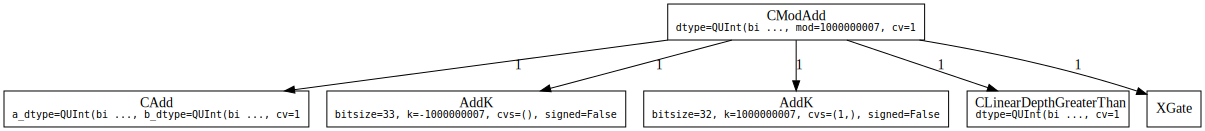

#### Counts totals:
 - `AddK`: 1
 - `AddK`: 1
 - `CAdd`: 1
 - `CLinearDepthGreaterThan`: 1
 - `XGate`: 1

In [16]:
from qualtran.resource_counting.generalizers import ignore_split_join
cmodadd_example_g, cmodadd_example_sigma = cmodadd_example.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(cmodadd_example_g)
show_counts_sigma(cmodadd_example_sigma)